In [1]:
#https://likegeeks.com/python-sqlite3-tutorial/#Drop-table

In [2]:
import sqlite3
from sqlite3 import Error


def create_connection(db_file):
    """ create a database connection to a SQLite database """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print(sqlite3.version)
    except Error as e:
        print(e)
    finally:
        if conn:
            conn.close()


if __name__ == '__main__':
    create_connection(r"reccatches1.db")

2.6.0


In [3]:
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)

    return conn


def create_table(conn, create_table_sql):
    """ create a table from the create_table_sql statement
    :param conn: Connection object
    :param create_table_sql: a CREATE TABLE statement
    :return:
    """
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)


def main():
    database = r"reccatches1.db"

    sql_create_reccatches_table = """ CREATE TABLE IF NOT EXISTS reccatches (                                        
                                        permitnr INT NOT NULL,
                                        nrlobster INT NOT NULL,
                                        fmonth text NOT NULL,
                                        fyear INT NOT NULL,
                                        area text NOT NULL
                                    ); """

    

    # create a database connection
    conn = create_connection(database)

    # create tables
    if conn is not None:
        # create projects table
        create_table(conn, sql_create_reccatches_table)
       
    else:
        print("Error! cannot create the database connection.")


if __name__ == '__main__':
    main()

In [4]:
#Check which tables exist
con = sqlite3.connect('reccatches1.db')

def sql_fetch(con):

    cursorObj = con.cursor()

    cursorObj.execute('SELECT name from sqlite_master where type= "table"')

    print(cursorObj.fetchall())

sql_fetch(con)

[('reccatches',)]


In [5]:
#Drop a table
con = sqlite3.connect('reccatches1.db')

def sql_fetch(con):

    cursorObj = con.cursor()

    cursorObj.execute('DROP table if exists reccatches')

    con.commit()

sql_fetch(con)

In [6]:
#Insert data into table. Fill all areas with 0 nrlobster as a start
con = sqlite3.connect('reccatches1.db')

def sql_insert(con, entities):

    cursorObj = con.cursor()
    
    cursorObj.execute('INSERT INTO reccatches(permitnr, nrlobster, fmonth, fyear, area) VALUES(?, ?, ?, ?, ?)', entities)
    
    con.commit()

entities = (123456, 4, 'Jan', 2020, 'F')

sql_insert(con, entities)

In [5]:
#Fetch data from table
con = sqlite3.connect('reccatches1.db')

def sql_fetch(con):

    cursorObj = con.cursor()

    cursorObj.execute('SELECT * FROM reccatches')

    rows = cursorObj.fetchall()

    for row in rows:

        print(row)

sql_fetch(con)

(123456, 4, 'Jan', 2020, 'F')
(852963, 2, 'Feb', 2019, 'D')
(789123, 5, 'Feb', 2020, 'B')
(145963, 8, 'Feb', 2019, 'D')


In [8]:
con = sqlite3.connect('reccatches1.db')

def sql_fetch(con):

    cursorObj = con.cursor()

    cursorObj.execute('SELECT area, avg(nrlobster) FROM reccatches GROUP BY area')

    rows = cursorObj.fetchall()

    for row in rows:

        print(row)

sql_fetch(con)

('F', 4.0)


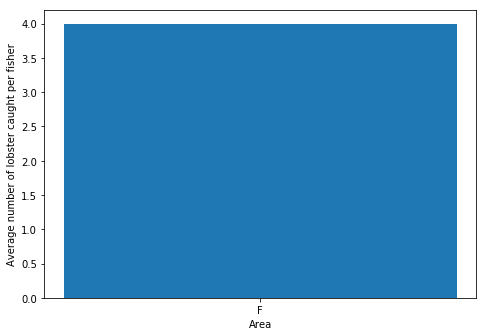

In [10]:
#Graph the data. Place this code in app.ipynb to run in a screen. Class EightthWindow. Format is in .kv file of BoxLayouts

import matplotlib.pyplot as plt
#from matplotlib import style
#style.use('ggplot')
#import numpy as np

con = sqlite3.connect('reccatches1.db')
c = con.cursor()

def graph_data():
    c.execute('SELECT area, avg(nrlobster) as avglobster FROM reccatches GROUP BY area')
    data = c.fetchall()
    
    area = []
    avglobster = []
    
    for row in data:
        area.append(row[0])
        avglobster.append(row[1])

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.set_ylabel('Average number of lobster caught per fisher')
    ax.set_xlabel('Area')
    ax.bar(area,avglobster)
    plt.show()
    
graph_data()

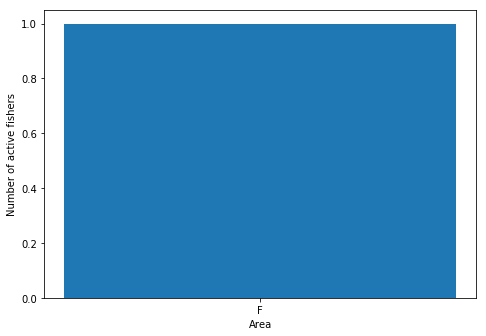

In [11]:
con = sqlite3.connect('reccatches1.db')
c = con.cursor()

def graph_data():
    c.execute('SELECT area, count(distinct permitnr) as nrfishers FROM reccatches GROUP BY area')
    data = c.fetchall()
    
    area = []
    avglobster = []
    
    for row in data:
        area.append(row[0])
        avglobster.append(row[1])

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.set_ylabel('Number of active fishers')
    ax.set_xlabel('Area')
    ax.bar(area,avglobster)
    plt.show()
    
graph_data()